## Multivariate linear regression and feature scaling

### Load the data and perform a preliminary investigation

m = 100 training examples
n = 4 features


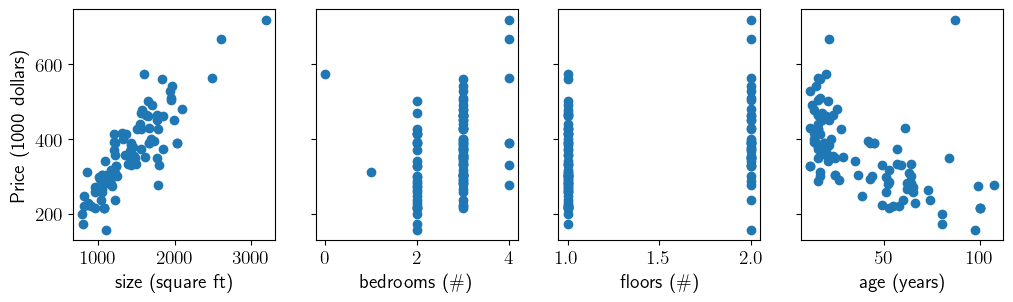

In [48]:
%run ../src.ipynb

data = np.loadtxt("../data/houses.txt", delimiter=',')
x = data[:,0:-1]
y = data[:,-1]

m, n = X.shape
print(f"m = {m} training examples")
print(f"n = {n} features")

features = ['size (square ft)','bedrooms (\#)','floors (\#)','age (years)']

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Price (1000 dollars)")
plt.show()

### Use gradient descent to find the best linear fit for the original data

Iteration 0: Cost = 44154.43013429887
Iteration 100: Cost = 1565.1331408227843
Iteration 200: Cost = 1560.9867736519802
Iteration 300: Cost = 1556.9161830566875
Iteration 400: Cost = 1552.9199838072077
Iteration 500: Cost = 1548.9968159964537
Iteration 600: Cost = 1545.1453445770574
Iteration 700: Cost = 1541.364258906907
Iteration 800: Cost = 1537.6522723030198
Iteration 900: Cost = 1534.008121603552
w = [ 2.54443890e-01 -1.51872883e-04 -5.74533712e-04 -5.63067399e-02], b = 0.0006205565597795542


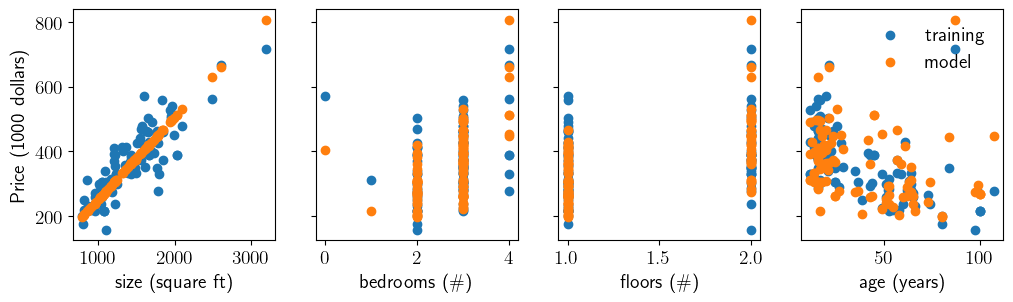

Perhaps we can do a better job by feature scaling! At least we can manage to use a larger learning rate.


In [51]:
w0 = np.zeros(n)
b0 = 0

alpha = 1e-7 # very small!
numberIterations = 1000
w,b,J = gradient_descent(x,y,w0,b0,alpha,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

yhat = prediction_linear_regression(w,b,x)

def PLOT(x,y,yhat,features):
    fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y,label='training')
        ax[i].scatter(x[:,i],yhat,label='model')
        ax[i].set_xlabel(features[i])
    ax[0].set_ylabel("Price (1000 dollars)")
    plt.legend(frameon=False)
    plt.show()
    
PLOT(x,y,yhat,features)

print('Perhaps we can do a better job by feature scaling! At least we can manage to use a larger learning rate.')

### Use feature scaling (z-score):
$$\mathbf{x}^{(i)}:=\frac{\mathbf{x}^{(i)}-\mu_j}{\sigma_j}.$$
Here, $\mu_j$ and $\sigma_j$ are mean and standrad deviation of the feature $j$ data. 

Iteration 0: Cost = 57326.41707912138
Iteration 100: Cost = 221.72784412580978
Iteration 200: Cost = 219.7137092592752
Iteration 300: Cost = 219.71130463983715
Iteration 400: Cost = 219.71130176839506
Iteration 500: Cost = 219.71130176496624
Iteration 600: Cost = 219.71130176496214
Iteration 700: Cost = 219.7113017649621
Iteration 800: Cost = 219.7113017649619
Iteration 900: Cost = 219.71130176496183
w = [110.61335173 -21.47323884 -32.66070323 -37.77938362], b = 362.2395199999998


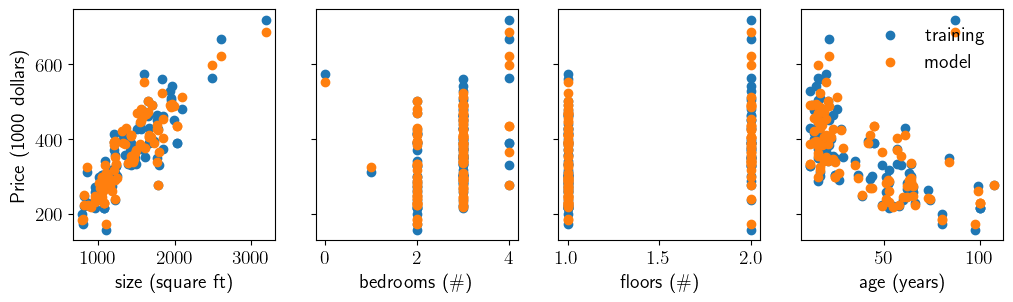

In [53]:
mu = np.mean(x,axis=0)
sigma = np.std(x,axis=0)

xScaled = (x-mu)/sigma # scaled training data

alpha = 0.1
w0 = np.zeros(n)
b0 = 0
numberIterations = 1000
w,b,J = gradient_descent(xScaled,y,w0,b0,alpha,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

yhat = prediction_linear_regression(w,b,xScaled)

PLOT(x,y,yhat,features)